# Lecture 5. Classification using logistic regression

### Classification
- $\mathbf{x}_i$ : feature vector of data instance $i$
Statistical thinking
- $y_i$ : class label (__categorical var.__)
    * _binary_ classification : 2 classes
    * _multi-class_ classification : n-classes

## 5-1. Motivating example

### 5-1-1. Dataset stored in sklearn or seaborn
* sklearn itself provides some famous datasets: sklearn.dataset
    * Fisher's iris dataset
    * diabetes, breast cancer : health data like diabetes or breast cancer
    * digits : MNIST handwritten digits
    * boston : house price data in Boston area
    * wine : wine quality
    * ...
* seaborn also provides some datasets
    * iris, titanic, geyser, ...
    * we will load data from seaborn in this chapter
    
### 5-1-2. Fisher's iris dataset
* R. Fisher : a famous British statistician
    - "the use of multiple measurements in taxonomic problems", Annals of Eugenics, 1936
    - proposed a method called "Linear Discriminant Analysis"
    - used iris dataset as an example
* iris dataset : 150 data instances
    - 3 classes of iris flowers ('붓꽃')
        - versicolor, virginica, setosa
    - 4 features 
        - sepal ('꽃받침'): length, width
        - petal ('꽃잎')  : length, width

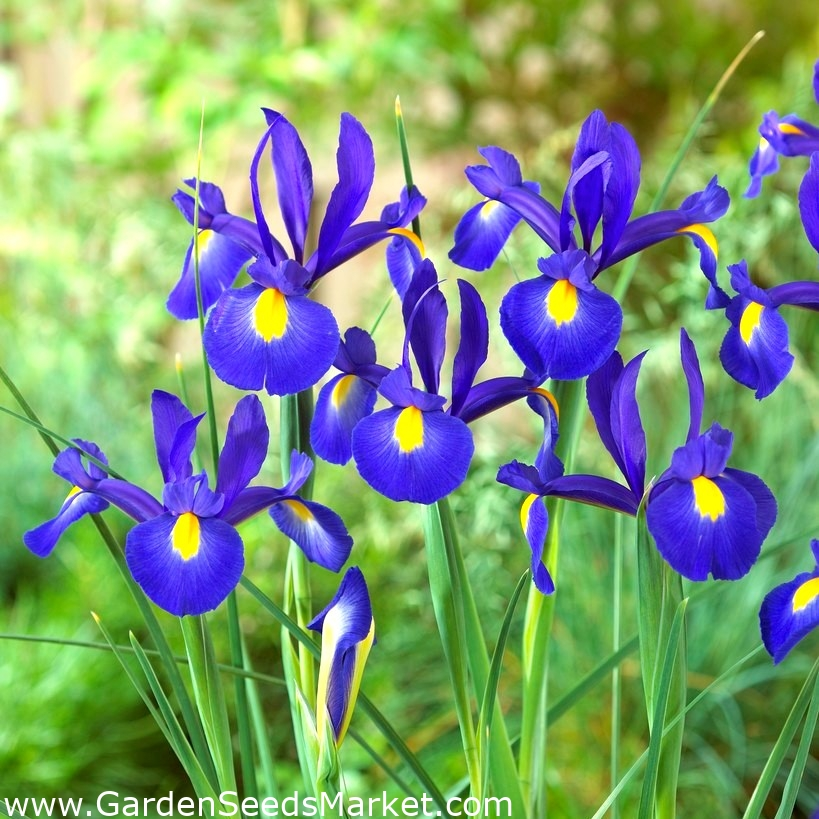

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

- features : X
    - sepal ('꽃받침') : length, width
    - petal ('꽃잎') : length, width  <br>
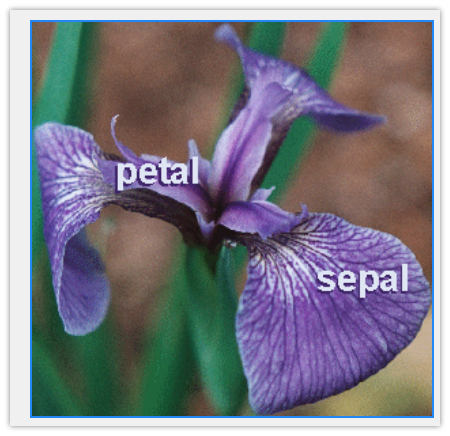

- categories (classes, labels) : Y
    - versicolor
    - virginica
    - setosa<br>
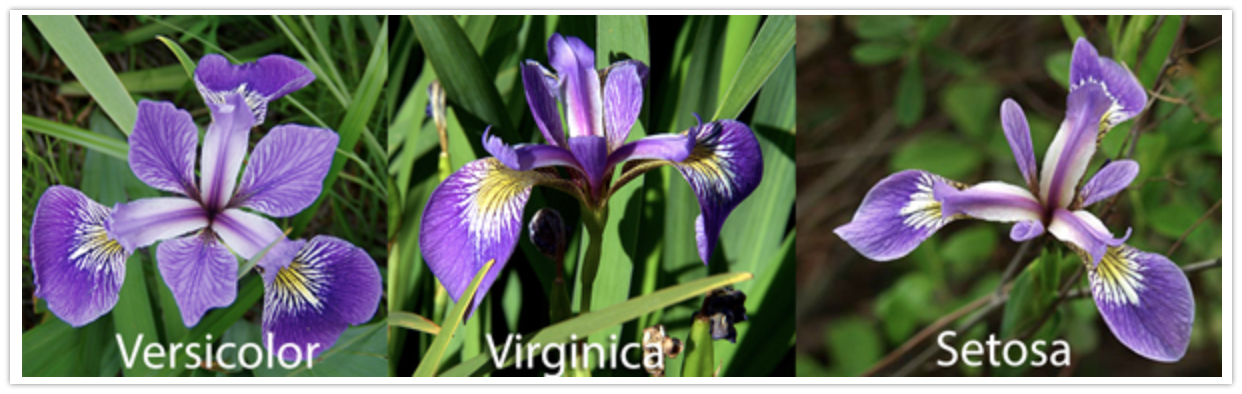   

In [2]:
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

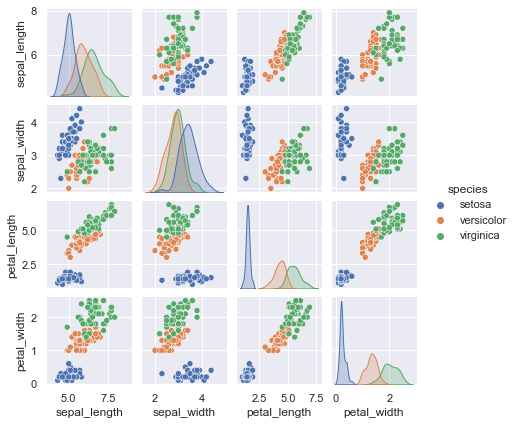

In [3]:
sns.pairplot(iris, hue='species', height=1.5);

### 5-1-3. Binary classification : virginica or not?
* Iris dataset is 3-class, 4-feature classification dataset
* as a start, we will use it as a binary classification dataset
    * __feature__ : use __sepal_length__ only
        * $\mathbf{x}_j = [$ sepal_length$_j] $
    * __label__ : __virginica or not__
        * $y_j \in$ {0(False), 1(True)}

In [4]:
iris['virginica?'] = (iris['species'] == 'virginica')
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     virginica?  
0         False  
1         False  
2         False  
3         False  
4         False  
..          ...  
145        True  
146        True  
147        True  
148        True  
149        True  

[150 rows x 6 columns]

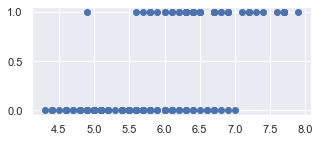

In [5]:
sns.set(rc = {'figure.figsize':(5,2)})
X_sleng = pd.DataFrame(iris['sepal_length'])
Y_virginica = iris['virginica?']
plt.scatter(X_sleng, Y_virginica);

### 5-1-4. Sigmoid function
- $\sigma(z) = \frac{1}{1+e^{-z}}$
    - many names: sigmoid, logistic, logistic sigmoid, expit 
    - monotinic increasing s-shape curve
    - $\sigma(z) \in [-1,1]$ : can be interpreted as probability
    - $\sigma(-\infty) = 0, \sigma(+\infty) = 1$  
    - $1-\sigma(z) = $<font color="red">TAQ</font>[<font color="white"> $\sigma(-z)$ </font>]  
    - $\sigma'(z) = $<font color="red">TAQ</font>[<font color="white">$\sigma(z)(1-\sigma(z))$ </font>] 

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

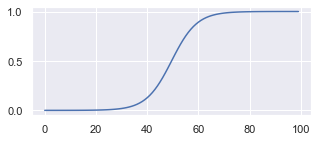

In [7]:
z = np.linspace(-10,10,100)
sz = sigmoid(z)
sns.set(rc = {'figure.figsize':(5,2)})
plt.plot(sz);

### 5-1-5. Logistic regression
- simple linear model for binary classification
- model : $p^1(\mathbf{x}) = \sigma(z)$, where $z = \mathbf{x}^T\mathbf{w}$ (_logit_)
    * using sigmoid function
    * $p^1(\mathbf{x}) = P[\mathbf{x}\in\text{virginica}]$
    * $p^0(\mathbf{x}) = P[\mathbf{x}\in\text{virginica}] = 1 - p^1(\mathbf{x})$

#### fitting model : gradient descent
- define loss function $L(\mathbf{w})$
- $\min_\mathbf{w} L(\mathbf{w}) \to \mathbf{w}^* = \arg \min_\mathbf{w} L(\mathbf{w})$
    - closed form solution in linear regression (with MSE loss function)
    - __gradient descent__ method if no closed form solution is available
        * $\mathbf{w}_{t+1} =  \mathbf{w}_t -$ <font color="red">TAQ</font>[<font color="white">$\alpha\nabla_\mathbf{w}L$ </font>] 
        * $\nabla_\mathbf{w}L=\frac{dL}{d\mathbf{w}}$ : gradient of loss w.r.t. $\mathbf{w}$
        * $\alpha$ : step size, learning rate 
            * should be set to a small value to avoid diverge

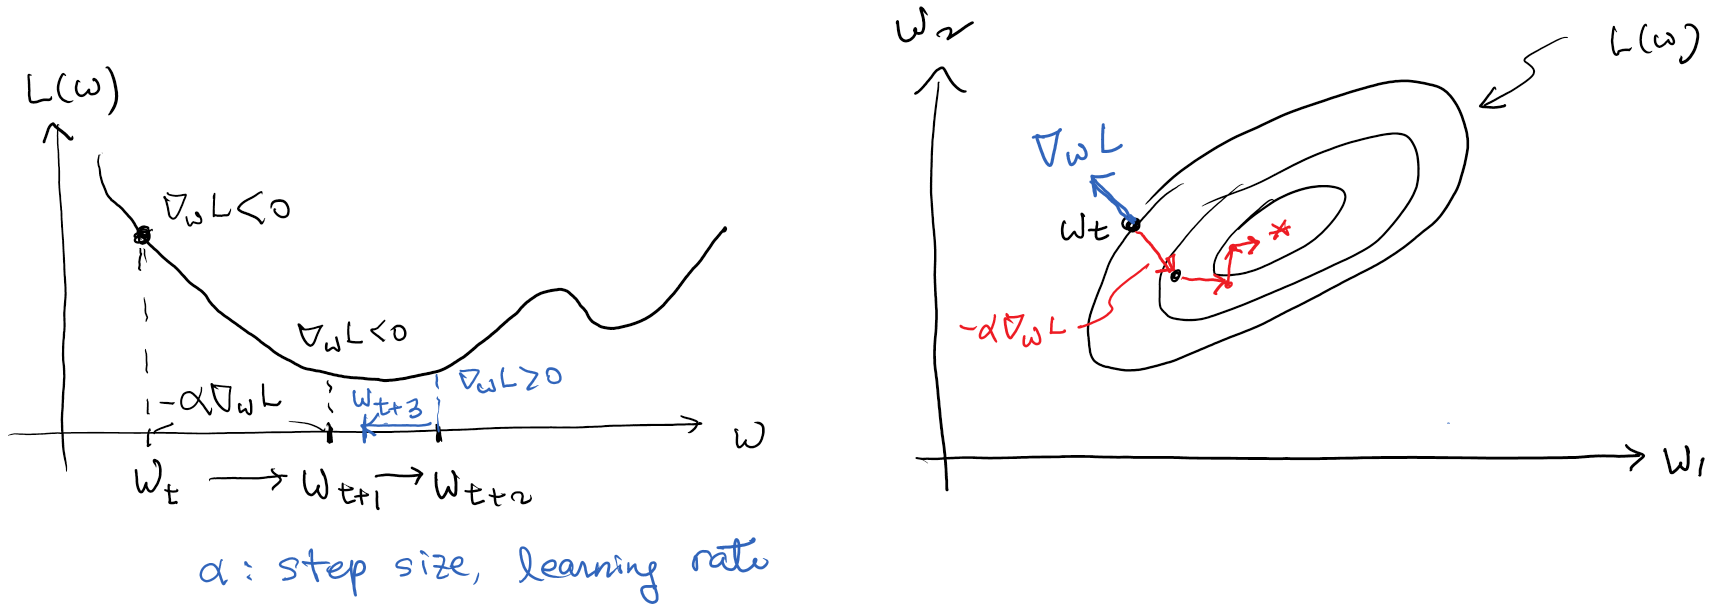

#### loss function?
- assume binary label : $y_j \in \{0, 1\}$ 
- feature vector : $\mathbf{x}_j = [1, x_{1,j}, x_{2,j}, ... ]$ 
- __MSE loss__
    * $L(\mathbf{w}) = \frac{1}{|D_{train}|}\sum_{j\in D_{train}} (p^1(\mathbf{x}_j) - y_j)^2  = \frac{1}{|D_{train}|}\sum_{j\in D_{train}} (\sigma(z_j) - y_j)^2 $
        * where $z_j = \mathbf{x}_j^T\mathbf{w}$ 
    * $\frac{dL}{d\mathbf{w}} = \frac{1}{|D_{train}|}\sum_{j\in D_{train}}2(\sigma(z_j) - y_j)\sigma(z_j)(1-\sigma(z_j))\mathbf{x}_j $

- __Cross entropy loss__
    * $L(\mathbf{w}) = -\frac{1}{|D_{train}|}\sum_{j\in D_{train}}\left[y_j \log{p(\mathbf{x}_j)}+(1-y_j) \log{(1-p(\mathbf{x}_j))}\right]$
    * $\frac{dL}{d\mathbf{w}} = \frac{1}{|D_{train}|}\sum_{j\in D_{train}}\left(\sigma(z_j)-y_j\right)\mathbf{x}_j $

### 5-1-6. Logistic regression in sklearn

In [8]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_sleng,Y_virginica)
print(model1.intercept_, model1.coef_)

[-14.10055903] [[2.22982158]]


In [9]:
Yhat = model1.predict(X_sleng)
correct = (Yhat == Y_virginica).sum()
print (f"correct / total = {correct}/{Yhat.shape[0]}")

correct / total = 120/150


In [10]:
def plot_model(model, X, Y):
    sns.set(rc = {'figure.figsize':(5,2)})
    plt.scatter(X, Y)
    xr = np.linspace(4,8,21).reshape((-1,1))
    p_xr = model.predict_proba(xr)[:,1]
    plt.plot(xr, p_xr, 'k')

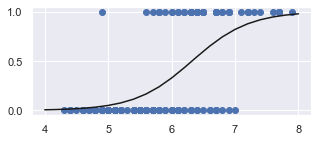

In [11]:
w = np.array([model1.intercept_[0], model1.coef_[0,0]])
plot_model(model1, X_sleng, Y_virginica);

### 5-1-7. Evaluation of classification model
- __Confusion matrix__ : TP, FN, FP, TN
- __Accuracy__ (True rate) a = P[correct]
- __Error rate__ (False rate) e = incorrect / total = 1 -a
- __Precision__ p = P[correct | pred = positive] = TP / (TP+FP)
- __Recall__ (=sensitivity, TPR) r = P[correct | real = positive] = TP / (TP+FN)
- __Specificity__ (TNR) = P[correct | real = negative] = TN / (FP+TN)
- __F1 score__ f1 = 2pr / (p + r) : harmonic mean of precision and recall

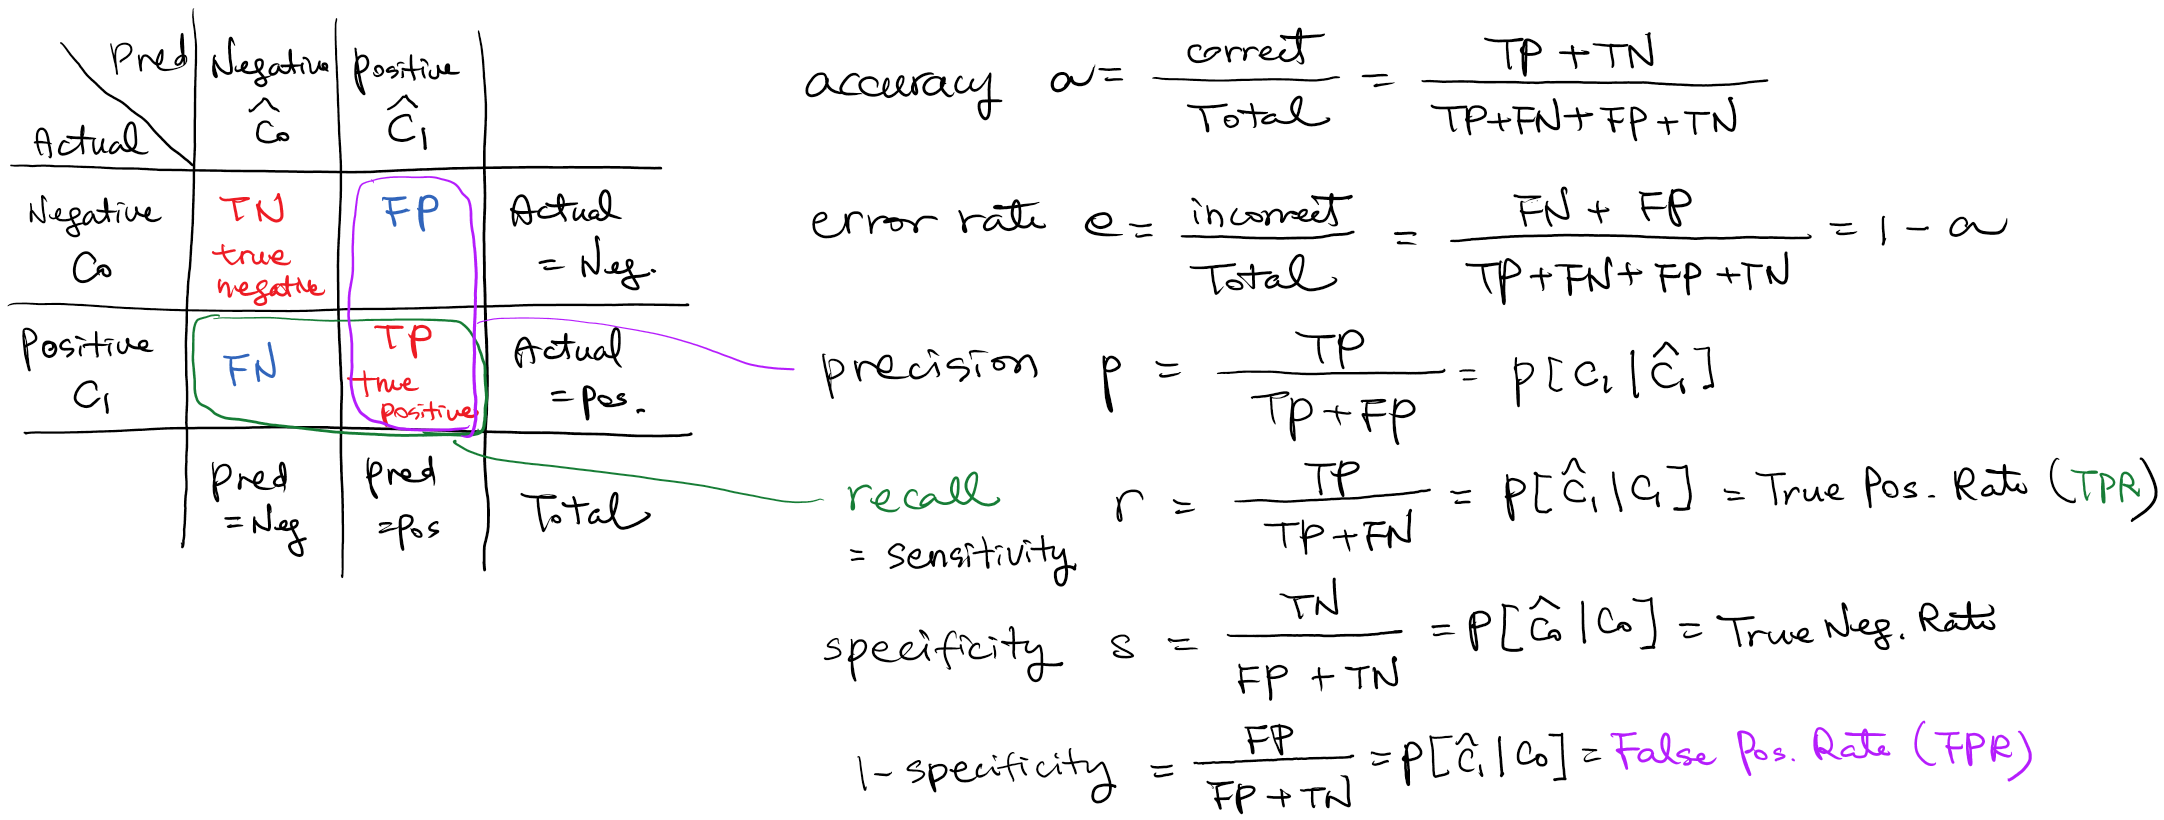

#### Accuracy and confusion matrix
- model.predict(X) : 1 if p(X) > 0.5, 0 otherwise
- model.score(X,Y) : accuracy based on model.predict(X) compared to Y

accuracy score = 0.8


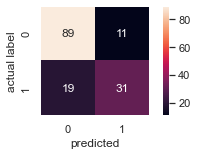

In [12]:
from sklearn.metrics import confusion_matrix
print(f'accuracy score = {model1.score(X_sleng,Y_virginica)}')

Yhat = model1.predict(X_sleng)
cm = confusion_matrix(Y_virginica, Yhat)
sns.heatmap(cm, square=True, annot=True)
plt.ylabel('actual label')
plt.xlabel('predicted');

### 5-1-8. Performance of class probability prediction
- Classification model usually consists of 2 components:
    * prediction : predicting class probability
        * $ x \mapsto \hat{\mathbf{p}}(x)$, where $\hat{\mathbf{p}}(x)=\left(\hat{p}^1(x), .., \hat{p}^c(x)\right)$ 
            * $\hat{p}^i(x) : \text{probability for class } i$ 
    * decision : determining class label from predicted probability
        * $ \hat{\mathbf{p}}(x) \mapsto \hat{y}(x)$, where $\hat{y}(x)$ : class label
        * '_most probable_' decision : $ \hat{y}(x) = \arg\max \hat{\mathbf{p}}(x) $
        * '_threshold_' decision : $ \hat{y}(x) = \mathbf{1} (\hat{p}^1(x) \geq \theta) = \begin{cases} 
        1, & \hat{p}^1(x) \geq \theta\\  
        0, & \text{otherwise}  
          \end{cases}$
            * for binary classfication only
            * '_most probable_' decision = '_thershold_' decision with $\theta = $ <font color="red">TAQ</font>[<font color="white">0.5 </font>] 
- accuracy, error rate, precision, ... : combined performance of prediction + decision
- How to compare the performance of __prediction model__ only?
    * need performance measure for *any* decision threshold
    * AUC-ROC : Area under ROC curve, AUROC
    * AUPRC : Area under Precision-Recall curve  
        * AUPRC $\approx$ AP(average precision)  
        * mAP (mean average precision) = mean{AP$_i$; $i=1..C$}
            - for multi-class classfication  
            - AP$_i$ : average precision for class $i$

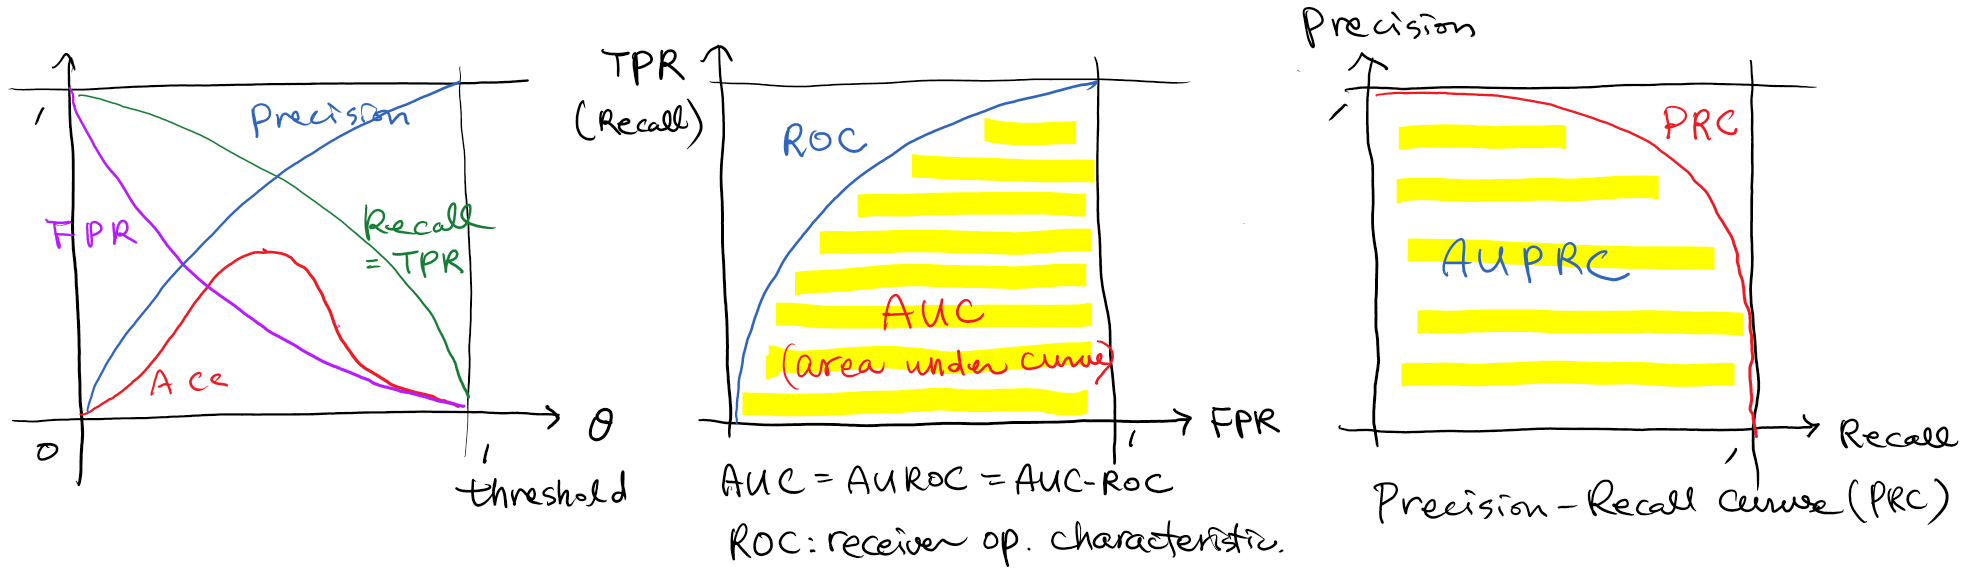

#### Performance of binary classification model

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
def display_cm(Y, Yhat):
    plt.subplot(1,4,1)
    cm = confusion_matrix(Y, Yhat)
    sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
    plt.ylabel('actual label')
    plt.xlabel('predicted');
    plt.title('Confusion matrix')

In [15]:
def display_curves(model, X, Y, prefix):
    p_hat = model.predict_proba(X)
    p_hat1 = p_hat[:, 1]  # probabiity for class 1

    auc_roc = roc_auc_score(Y, p_hat1)
    print(f"{prefix} AUC_ROC score = {auc_roc}")
    
    fpr, tpr, th = roc_curve(Y, p_hat1)
    prec, recall, thpr = precision_recall_curve(Y, p_hat1)
    auprc = auc(recall, prec)
    print(f"{prefix} AP score = {auprc}")

    plt.subplot(1,4,2)
    plt.plot(th[1:], fpr[1:], 'r', label='FPR')
    plt.plot(th[1:], tpr[1:], 'g', label='TPR(Recall)')
    plt.plot(thpr, prec[:-1], 'b', label='Precision')
    plt.legend()
    
    plt.subplot(1,4,3)
    plt.plot(recall, prec, 'r')
    plt.title('ROC curve')
    
    plt.subplot(1,4,4)
    plt.plot(recall, prec, 'r')
    plt.title('P-R curve')    

In [16]:
def bc_performance(model, X, Y, prefix=''):
    acc = model.score(X,Y)
    print(f'{prefix} Accuracy score = {acc}')
    
    Yhat = model.predict(X)
    
    sns.set(rc = {'figure.figsize':(12,3)})

    display_cm(Y, Yhat)
    display_curves(model, X, Y, prefix)
    
    print(f"{prefix} Classfication report:")
    print(classification_report(Y, Yhat))

 Accuracy score = 0.8
 AUC_ROC score = 0.8871
 AP score = 0.7943150935863296
 Classfication report:
              precision    recall  f1-score   support

       False       0.82      0.89      0.86       100
        True       0.74      0.62      0.67        50

    accuracy                           0.80       150
   macro avg       0.78      0.76      0.76       150
weighted avg       0.80      0.80      0.80       150



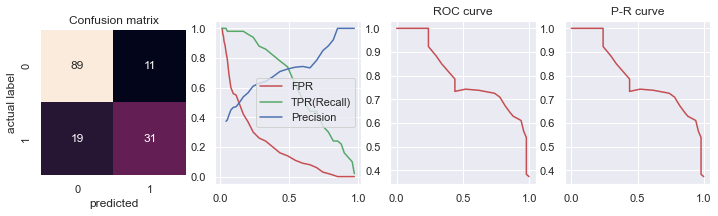

In [17]:
bc_performance(model1, X_sleng, Y_virginica);

## 5-2. Logistic regression with multiple features

* Logistic regression with multiple features
    * features : use all features
        * $\mathbf{x}_j = [1, \text{sepal_length}_j, \text{sepal_width}_j, \text{petal_length}_j, \text{petal_width}_j] $
    * binary classification: __virginica or not__  
        * $y_j \in$ {0(False), 1(True)}
* multi-feature logistic regression shows much better performance than single-feature

In [18]:
X_all = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
Y_virginica = iris['virginica?']

 Accuracy score = 0.9733333333333334
 AUC_ROC score = 0.9975999999999999
 AP score = 0.9951638571214363
 Classfication report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       100
        True       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



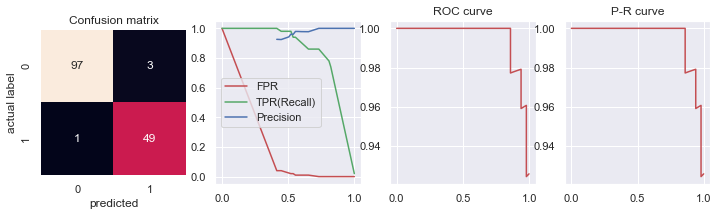

In [19]:
model2 = LogisticRegression()
model2.fit(X_all, Y_virginica)
bc_performance(model2, X_all, Y_virginica);

## 5-3. Splitting dataset
- $D_{train}$ : for fitting model
- $D_{test}$ : for testing performance, internal test set

In [20]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_all, Y_virginica, test_size=0.25)

In [21]:
model3 = LogisticRegression()
model3.fit(X_trn,Y_trn);

train Accuracy score = 0.9821428571428571
train AUC_ROC score = 0.9989331436699859
train AP score = 0.9979654622660163
train Classfication report:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        74
        True       0.95      1.00      0.97        38

    accuracy                           0.98       112
   macro avg       0.97      0.99      0.98       112
weighted avg       0.98      0.98      0.98       112



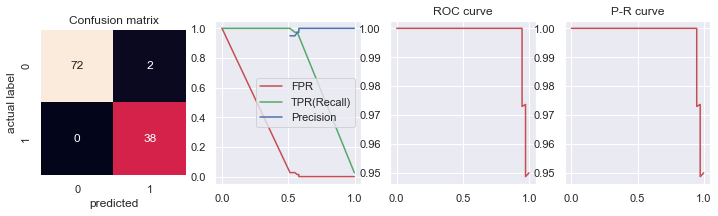

In [22]:
bc_performance(model3, X_trn, Y_trn, "train");

test Accuracy score = 0.9473684210526315
test AUC_ROC score = 1.0
test AP score = 1.0
test Classfication report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96        26
        True       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.95      0.95      0.95        38



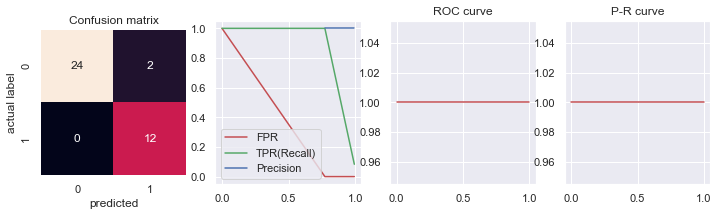

In [23]:
bc_performance(model3, X_tst, Y_tst, "test");

## 5-4. Logistic regression for multi-class classification

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns; sns.set()
def mcc_performance(model, X, Y, cr=True, cm=True, prefix=""):
    print(f"{prefix}accuracy = {model.score(X, Y)}")
    if cr or cm:
        Yhat = model.predict(X)
        if cr:
            print("Classfication report:")
            print(classification_report(Y, Yhat))
        if cm:
            cm = confusion_matrix(Y, Yhat)
            s = cm.shape[0] * 0.6
            sns.set(rc = {'figure.figsize':(s,s)})
            sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
            plt.ylabel('actual label')
            plt.xlabel('predicted')
    ;

### 5-4-1. Multiclass classification with one-vs-rest

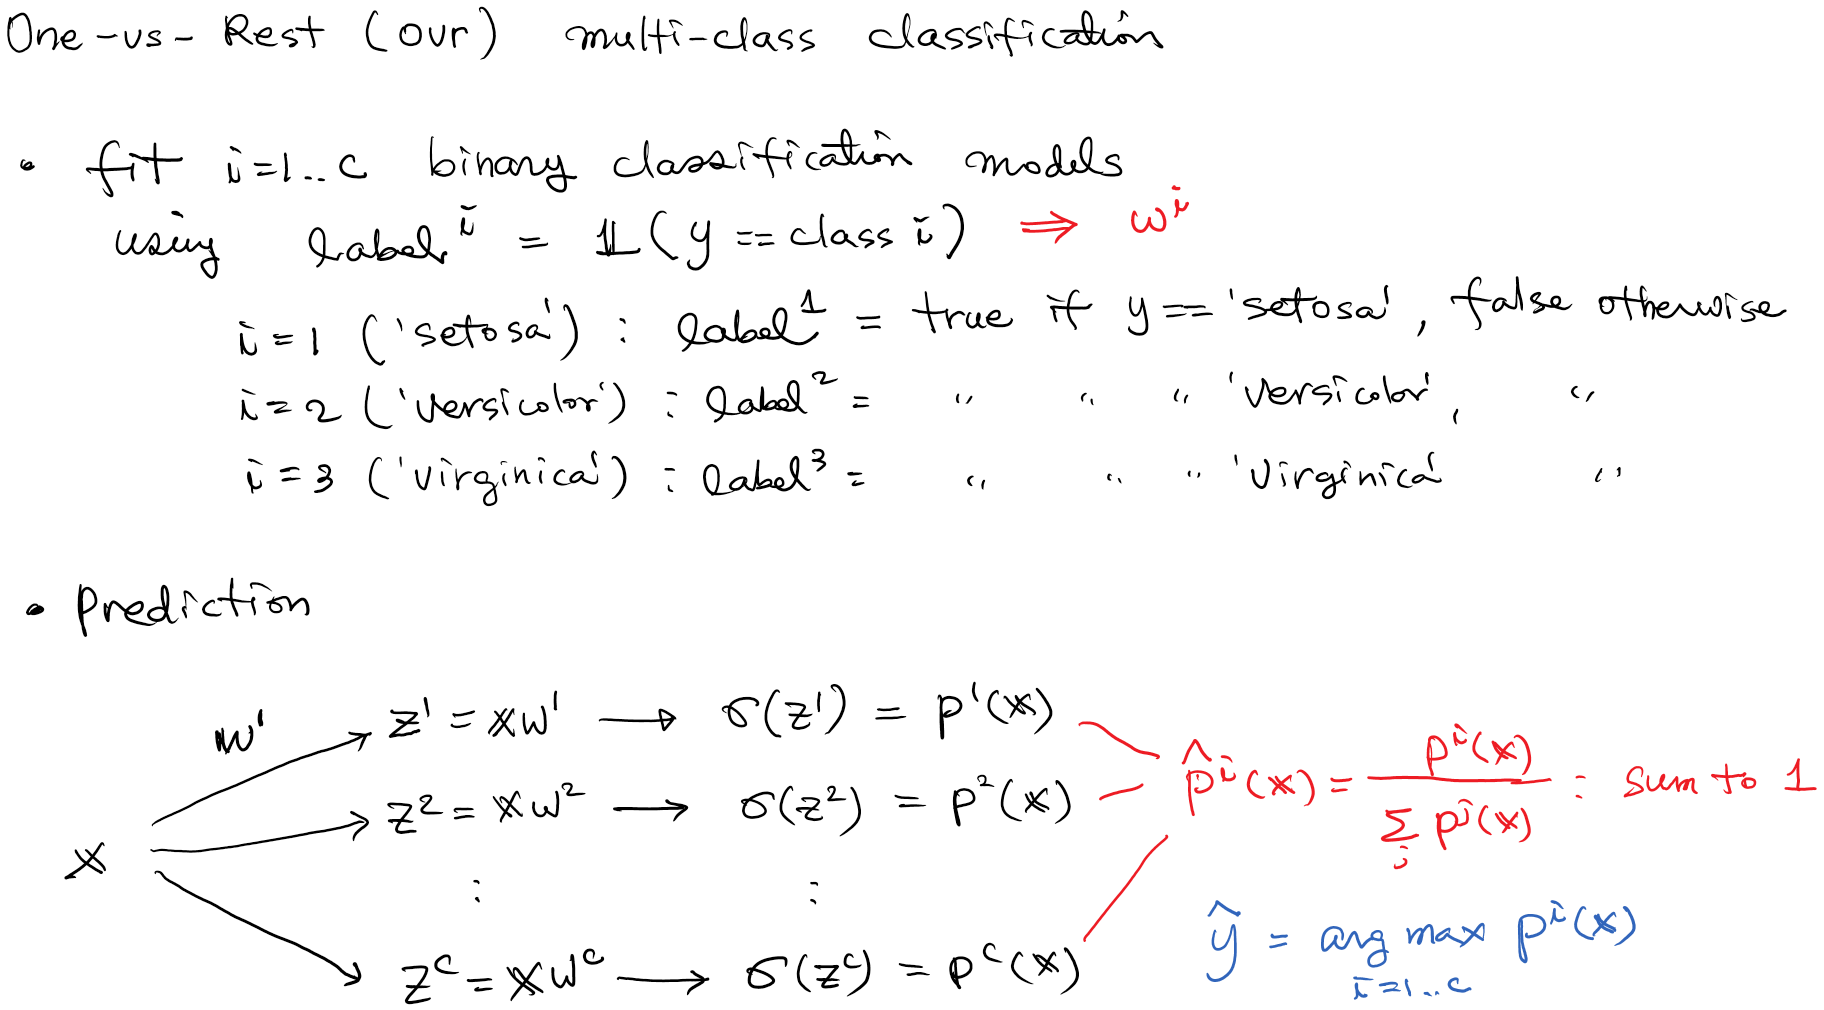

In [25]:
X_all = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
Y_species = iris['species']

accuracy = 0.9533333333333334
Classfication report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.90      0.93        50
   virginica       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



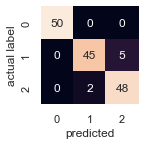

In [26]:
model_ovr = LogisticRegression(multi_class='ovr')
model_ovr.fit(X_all, Y_species)
mcc_performance(model_ovr, X_all, Y_species)

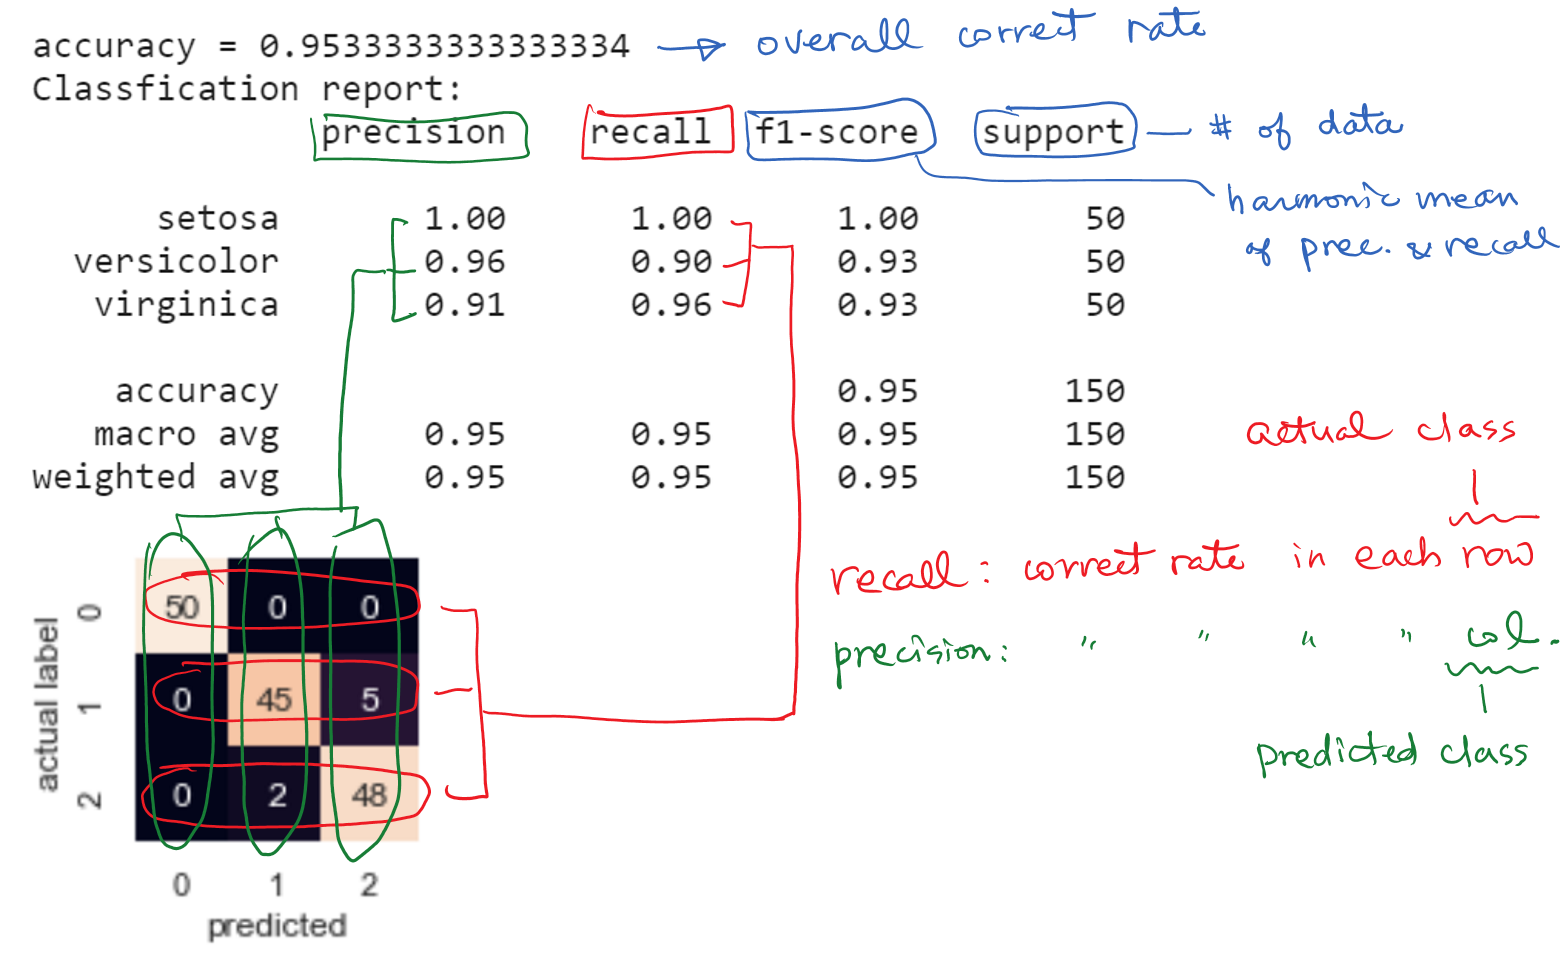

### 5-4-2. Multiclass logistic regression with softmax
- Multinomial logistic regression
- Softmax classification

#### Softmax function
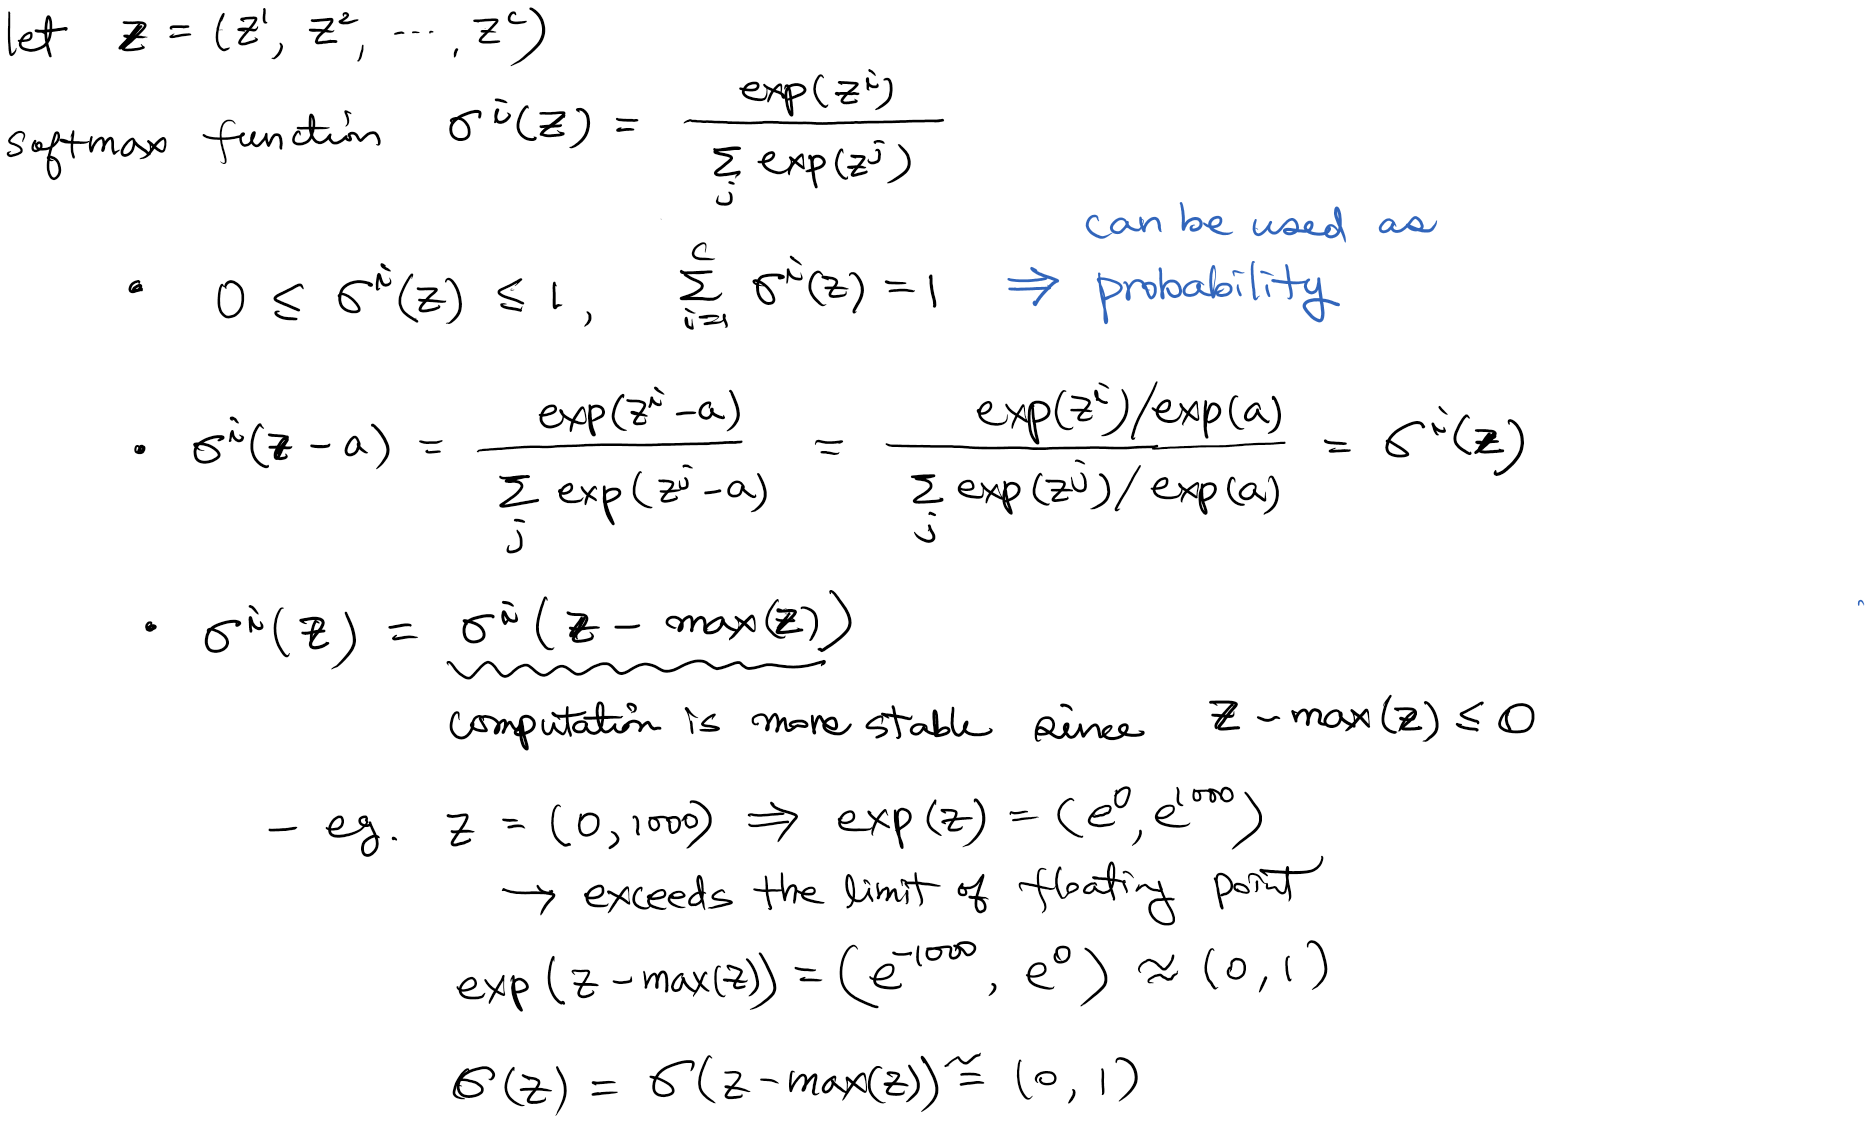

#### Multinomial logistic regression model
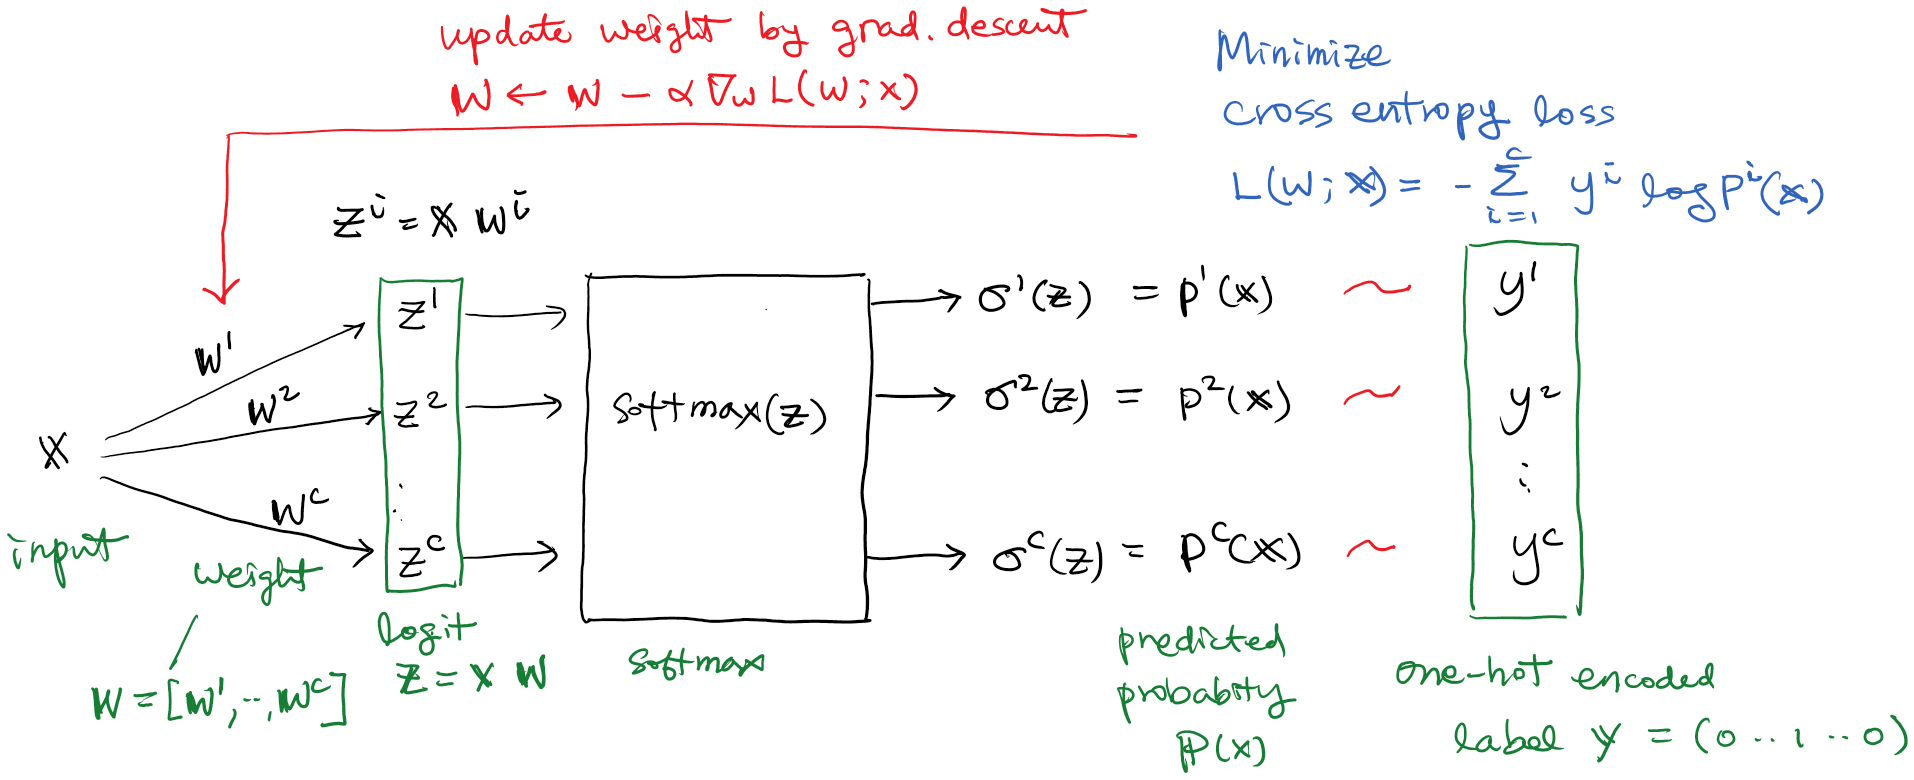

#### Cross entropy loss for multi-class classification
* $L(\mathbf{w}) = \frac{1}{|D|}\sum_{j\in D_{train}} H\left(\mathbf{y}_j, \mathbf{p}(\mathbf{x}_j)\right)$
    * mean cross entropy of data set $D$
* $H\left(\mathbf{y}_j, \mathbf{p}(\mathbf{x}_j)\right)=-\sum_{i\in \{1..C\}}y_j^i \log{p^i(\mathbf{x}_j)}$
    * cross entropy between $\mathbf{y}_j$ and $\mathbf{p}(\mathbf{x}_j)$
    * $\mathbf{y}_j = \left(y_j^1,...,y_j^C\right)$ : 1-hot encoded label of data $i$
        * 1-hot vector = $(0,...,0,1,0,...0)$ 
        * binary vector with only one $1$ and all others are $0$
    * $\mathbf{p}(\mathbf{x}_j) = \left(p^1(\mathbf{x}_j),...,p^C(\mathbf{x}_j)\right)$ : predicted probabililty of data $i$

accuracy = 0.9733333333333334


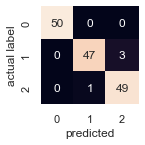

In [27]:
model_softmax = LogisticRegression(multi_class='multinomial', max_iter=200)
model_softmax.fit(X_all, Y_species)
mcc_performance(model_softmax, X_all, Y_species, cr=False)

### 5-4-3. Decision boundary 
- Logistic regression is called __linear classifier__
    * even though it involves non-linear sigmoid function
    * why : <font color="red">TAQ</font>[<font color="white">decision boudary </font>]  is linear
        * $\mathbf{p}^1(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w}^1)\geq\sigma(\mathbf{x}^T\mathbf{w}^2)= \mathbf{p}^2(\mathbf{x})$
        * $\mathbf{x}^T\mathbf{w}^1\geq\mathbf{x}^T\mathbf{w}^2 $ ($\because \sigma(z)$ is monotonic increasing)
        * $\mathbf{x}^T(\mathbf{w}^1-\mathbf{w}^2) = 0$  ($\therefore$ linear decision boundary)

In [28]:
def scatter_plot(sp, c):
    g = iris[iris['species'] == sp]
    plt.scatter(g['sepal_width'], g['petal_length'], color=c, label=sp)

def scatter_plot_all():
    scatter_plot('setosa', 'b')
    scatter_plot('versicolor', 'm')
    scatter_plot('virginica', 'g')
    plt.legend()
    
def y_bnd (a0, a, b0, b, xbar, x):
    c = a - b
    sw, pl = 1, 2
    xb = xbar.copy()
    xb[sw] = x
    xb[pl] = 0
    return -((a0 - b0) + (c*xb).sum()) / c[pl]
    
def boundary_plot(a0, a, b0, b, xmin, xmax, xbar, c, label):
    ymin = y_bnd(a0, a, b0, b, xbar, xmin)
    ymax = y_bnd(a0, a, b0, b, xbar, xmax)
    plt.plot([xmin,xmax], [ymin,ymax], c, label=label)

def boundary_plot_all(w0, w, xmin, xmax, xbar):
    boundary_plot(w0[0], w[0], w0[1], w[1], xmin, xmax, xbar, 'k', 'set-ver')
    boundary_plot(w0[0], w[0], w0[2], w[2], xmin, xmax, xbar, 'r', 'set-vir')
    boundary_plot(w0[1], w[1], w0[2], w[2], xmin, xmax, xbar, 'c', 'ver-vir')
    plt.legend()

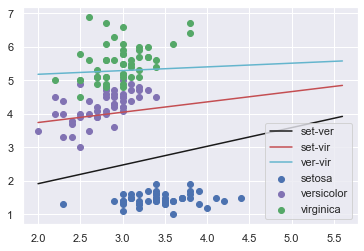

In [29]:
sns.set(rc = {'figure.figsize':(6,4)})
scatter_plot_all()

w0 = model_softmax.intercept_
w = model_softmax.coef_
xbar = X_all.mean(axis=0).values
xmin = iris['sepal_width'].min()
xmax = iris['sepal_width'].max()
xmax += (xmax - xmin)*0.5
boundary_plot_all(w0, w, xmin, xmax, xbar)

### 5-4-4. Preprocessing : standard scaling

- Model fitting works better when all features are of similar scale
- Standard scaling : normalization
    - sklearn.preprocessing.StandardScaler
    - $\mathbf{x}_j = (x_{1,j}, x_{2,j}, ..., x_{p,j})$ : data instance $j$
    - $X = \left[\mathbf{x}_1^T, ..., \mathbf{x}_n^T \right]^T$ : data set
    - $\mathbf{\mu} = (\mu_1, ..., \mu_p)$ : mean vector
        - $\mu_i = \text{mean}\{x_{i,j}; j=1..n\}$ : mean of $i$-th component $x_{1,*}$
    - $\mathbf{\sigma} = (\sigma_1, ..., \sigma_p)$ : std vector
        - $\sigma_i = \text{std}\{x_{i,j}; j=1..n\}$ : std of $i$-th component $x_{1,*}$
    - $Z = \frac{X-\mathbf{\mu}}{\mathbf{\sigma}}$ : makes mean=0, var.=1 
        - $\mathbf{z}_j = \frac{\mathbf{x}_j-\mathbf{\mu}}{\mathbf{\sigma}}$ : for each data instance $j$
        -  $z_{i,j} = \frac{x_{i,j}-\mu_i}{\sigma_i}$ : for each component $i$
    

#### other scalers
- sklearn.preprocessing has more scalers for preprocessing:
    * MinMaxScaler
    * RobustScaler

accuracy = 0.9733333333333334


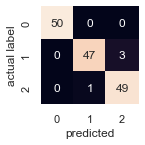

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_softmax = LogisticRegression(multi_class='multinomial')
pipe = make_pipeline(StandardScaler(), model_softmax)
pipe.fit(X_all, Y_species)
mcc_performance(pipe, X_all, Y_species, cr=False)

### 5-5. Model selection and hyper-parameter tuning
- __parameters__ of model: $\mathbf{w}$
- __hyper-parameters__ of model
    - 'penalty' : regularization term ('l1' or 'l2')
    - 'C' : weight of penality term, [0.01, 0.1, 1, 3, 5, 6, 7, 8, 9, 10, 15, 20, 100]
    - 'multi_class' : 'ovr' or 'multinomial'
- `GridSearchCV` : enumerate <font color="red">TAQ</font>[<font color="white">all combinations </font>] 
    - for each grid point in seach space
        * evaluate model
- `RandomizedSearchCV` : useful when search space is <font color="red">TAQ</font>[<font color="white">large, high dimension </font>]
    - repeat 
        * select a random combination of hyper-parameters from search space
        * evaluation model with selected hyper-parameters

In [31]:
def show_search_result(result, X_trn, Y_trn, X_tst, Y_tst):
    print(f'Best accuracy: {result.best_score_}')
    bp = result.best_params_
    print(f'Best hyperparameters: {bp}')

    best_model = LogisticRegression(C=bp['C'], penalty=bp['penalty'], multi_class=bp['multi_class'], max_iter=200)
    best_model.fit(X_trn, Y_trn)
    print("test accuracy of the best model", best_model.score(X_tst, Y_tst))    

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge

# prepare data and model
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_all, Y_species, test_size=0.25)
model = LogisticRegression(max_iter=200)

# define search space
p_space = dict()
p_space['C'] = [0.01, 0.1, 1, 3, 5, 6, 7, 8, 9, 10, 15, 20, 100]
p_space['penalty'] = ['l1', 'l2']
p_space['multi_class'] = ['ovr', 'multinomial']

In [33]:
grid_search = GridSearchCV(model, p_space, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_trn, Y_trn)
show_search_result(grid_result, X_trn, Y_trn, X_tst, Y_tst)

Best accuracy: 0.9458498023715414
Best hyperparameters: {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2'}
test accuracy of the best model 1.0


In [34]:
rnd_search = RandomizedSearchCV(model, p_space, n_jobs=-1, cv=5, n_iter=40)
rnd_result = rnd_search.fit(X_trn, Y_trn)
show_search_result(rnd_result, X_trn, Y_trn, X_tst, Y_tst)

Best accuracy: 0.9458498023715414
Best hyperparameters: {'penalty': 'l2', 'multi_class': 'ovr', 'C': 7}
test accuracy of the best model 1.0


## 5-6. MNIST Example : Handwritten digit recognition 
- MNIST data
    * NIST : National Institute of Standards and Technology, US. Dept. of Commerce
    * collected handwritten digit images
    * for ZIP code recognition
    * modified each image as 
        * 28x28(=784) pixels 
        * grayscale values : 0..255
        * with labels : 0, 1, 2, ..., 9  
        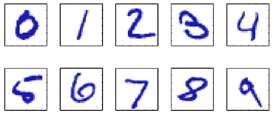

#### Load MNIST dataset and reshape

In [35]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [36]:
from sklearn.model_selection import train_test_split
X_all = mnist.data  # 70000 images
Y_all = mnist.target  # 70000 targets
X_trn, X_val, Y_trn, Y_val = train_test_split(X_all, Y_all, test_size=0.25)

#### Visualize some examples
* X[i] : flattened array of size=784, value = 0..255
    * X[i].reshape((28,28)) : 28x28 grayscale image
* Y[i] : target label (0..9)

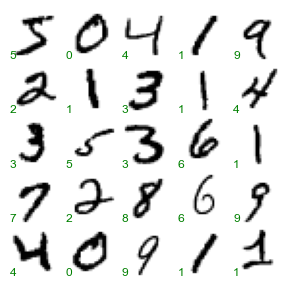

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(5, 5),
                     subplot_kw={'xticks':[], 'yticks':[]},
                     gridspec_kw=dict(hspace=0.0, wspace=0.0))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_all[i].reshape((28,28)), cmap='binary')
    ax.text(0.05, 0.05, str(Y_all[i]),
            transform=ax.transAxes, color='green')

In [48]:
from sklearn.linear_model import LogisticRegression
# mnist_softmax = LogisticRegression(multi_class='multinomial')  # default solver = lbfgs
mnist_softmax = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=200)
mnist_softmax.fit(X_trn, Y_trn);

c:\users\hyshin\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


accuracy = 0.9346095238095238


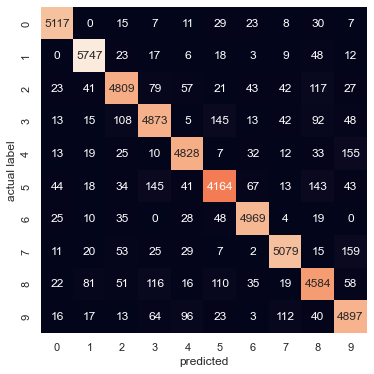

In [46]:
mcc_performance(mnist_softmax, X_trn, Y_trn, cr=False);

accuracy = 0.9198857142857143


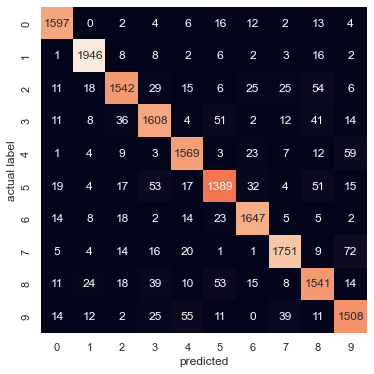

In [47]:
mcc_performance(mnist_softmax, X_val, Y_val, cr=False)